# Read csv files and plot learning curves for FedAvg experiment 2

In [1]:
import torch
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
import os
from os import walk
from os.path import join
os.getcwd()

'C:\\Users\\YWANG\\Federated-Learning-PyTorch'

In [3]:
file_path_1 = 'save\\figures-mnist\\data_src_exp_2_iid'
file_path_2 = 'save\\figures-mnist\\data_src_exp_2_non_iid'
_, _, filenames_1 = next(walk(file_path_1))
_, _, filenames_2 = next(walk(file_path_2))
# print(filenames)
# something = os.listdir(file_path)
# print(something)

In [4]:
files_to_read_1 = [join(file_path_1,f) for f in filenames_1]
files_to_read_2 = [join(file_path_2,f) for f in filenames_2]
# file_1 = os.path.join(file_path,'1-E1-B600-C0.1-Lr0.1-R1500.csv')
# print(file_1)
# print(files_to_read)

In [5]:
df_1 = [pd.read_csv(f) for f in files_to_read_1]
df_2 = [pd.read_csv(f) for f in files_to_read_2]
# print(len(df))
# print(df[0])

In [6]:
# data1 = pd.read_csv(file_1)
# print(data1)
# x1 = data1['Step']
# y1 = data1['Value']
# # x2 = [10*x for x in data1['Step'].tolist()]
# # y2 = data1['Value'].tolist()

In [27]:
# step=10
# x1_s = [d for i, d in enumerate(x1.tolist()) if i % step == 0]
# y1_s = [d for i, d in enumerate(y1.tolist()) if i % step == 0]

# manually set the label names
run_labels=[0]*9
run_labels[0] = '$E=1$,  $B=\infty$'
run_labels[1] = '$E=5$,  $B=\infty$'
run_labels[2] = '$E=1$,  $B=50$'
run_labels[3] = '$E=20$, $B=\infty$'
run_labels[4] = '$E=1$,  $B=10$'
run_labels[5] = '$E=5$,  $B=50$'
run_labels[6] = '$E=20$, $B=50$'
run_labels[7] = '$E=5$,  $B=10$'
run_labels[8] = '$E=20$, $B=10$'

# define linestyle and color
run_colors, run_linestyles = [0]*9, [0]*9

run_colors[0] = 'dodgerblue'
run_colors[1] = 'dodgerblue'
run_colors[2] = 'orange'
run_colors[3] = 'dodgerblue'
run_colors[4] = 'deeppink'
run_colors[5] = 'orange'
run_colors[6] = 'orange'
run_colors[7] = 'deeppink'
run_colors[8] = 'deeppink'

run_linestyles[0] = '-'
run_linestyles[1] = '--'
run_linestyles[2] = '-'
run_linestyles[3] = ':'
run_linestyles[4] = '-'
run_linestyles[5] = '--'
run_linestyles[6] = ':'
run_linestyles[7] = '--'
run_linestyles[8] = ':'

### choosing color and linestyle
Please see https://matplotlib.org/stable/gallery/color/named_colors.html and https://matplotlib.org/3.0.3/gallery/lines_bars_and_markers/line_styles_reference.html

Text(27.0, 0.5, 'Test acc')

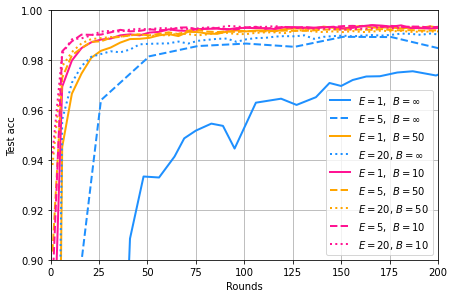

In [50]:
# plot the first figure for experiment 2 with iid data 
# step_1=15
plt.figure()
for i, data in enumerate(df_1):
    step_1 = 25 if i==1 else 5
    x = [dx for j, dx in enumerate(data['Step'].tolist()) if j % step_1 == 0]
    y = [dy for j, dy in enumerate(data['Value'].tolist()) if j % step_1 == 0]   
    plt.plot(x,y,label=run_labels[i], linestyle=run_linestyles[i], color=run_colors[i],linewidth=2)
#     plt.plot(x,y,label=run_labels[i],linewidth=2)
    plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.xlim(0,200)
plt.ylim(0.90,1.0)
plt.xlabel('Rounds')
plt.ylabel('Test acc')
# plt.savefig('save\\figures-mnist\\fedavg-exp-2-iid.png')

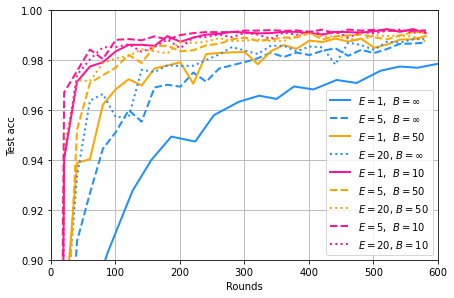

In [48]:
# plot the first figure for experiment 2 with non-iid data 
step_2=20
plt.figure()
for i, data in enumerate(df_2):
#     step_2 = 5 if i==1 else 5
    x = [dx for j, dx in enumerate(data['Step'].tolist()) if j % step_2 == 0]
    y = [dy for j, dy in enumerate(data['Value'].tolist()) if j % step_2 == 0]   
    plt.plot(x,y,label=run_labels[i], linestyle=run_linestyles[i], color=run_colors[i],linewidth=2)
#     plt.plot(x,y,label=run_labels[i],linewidth=2)
    plt.legend(loc='lower right')
plt.grid()
plt.tight_layout()
plt.xlim(0,600)
plt.ylim(0.90,1.0)
plt.xlabel('Rounds')
plt.ylabel('Test acc')
# plt.savefig('save\\figures-mnist\\fedavg-exp-2-non-iid.png')